# Soil Nutrients 

This notebook is for the data analysis and visualization on the dataset taken from the kaggle. (https://www.kaggle.com/datasets/madhankumar789/crop-yield-and-environmental-factors-2014-2023).



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [3]:
CSV = Path("crop_yield_dataset.csv")   # ensure this file is present
CROP_NAME = "rice"                      # case-insensitive
NUTRIENT_MAP = {"N": "Nitrogen", "P": "Phosphorous", "K": "Potassium"}
# Ballpark rice targets (adjust to local agronomy recommendations)
TARGETS = {"N": 90.0, "P": 40.0, "K": 40.0}

In [4]:
df = pd.read_csv(CSV)
df["Crop_Type"] = df["Crop_Type"].astype(str).str.strip().str.lower()

In [5]:
df.head()

,Date,Crop_Type,Soil_Type,Soil_pH,Temperature,Humidity,Wind_Speed,N,P,K,Crop_Yield,Soil_Quality
0,2014-01-01,wheat,Peaty,5.50,9.440599,80.000000,10.956707,60.5,45.0,31.5,0.000000,22.833333
1,2014-01-01,corn,Loamy,6.50,20.052576,79.947424,8.591577,84.0,66.0,50.0,104.871310,66.666667
2,2014-01-01,rice,Peaty,5.50,12.143099,80.000000,7.227751,71.5,54.0,38.5,0.000000,27.333333
3,2014-01-01,barley,Sandy,6.75,19.751848,80.000000,2.682683,50.0,40.0,30.0,58.939796,35.000000
4,2014-01-01,soybean,Peaty,5.50,16.110395,80.000000,7.696070,49.5,45.0,38.5,32.970413,22.166667


In [6]:
df.describe()

,Soil_pH,Temperature,Humidity,Wind_Speed,N,P,K,Crop_Yield,Soil_Quality
count,36520.000000,36520.000000,36520.000000,36520.000000,36520.000000,36520.000000,36520.00000,36520.000000,36520.000000
mean,6.602731,23.813996,74.256624,10.020153,66.011035,53.014006,42.01825,26.878480,37.516632
std,0.816973,8.920519,6.767587,2.998310,10.886721,8.812884,8.53781,25.740936,17.703171
min,5.500000,-3.540176,45.851089,-3.388906,45.000000,36.000000,27.00000,0.000000,13.291667
25%,6.250000,17.168542,69.745252,7.985872,58.500000,45.000000,35.00000,0.000000,22.500000
50%,6.500000,22.902987,77.097013,10.000299,65.000000,54.000000,42.00000,23.366344,35.583333
75%,6.750000,30.254748,80.000000,12.038546,71.500000,60.000000,49.50000,46.415729,49.291667
max,8.000000,54.148911,80.000000,22.606078,91.000000,72.000000,60.00000,136.711982,74.333333


In [7]:
df.isnull().sum()

Date            0
Crop_Type       0
Soil_Type       0
Soil_pH         0
Temperature     0
Humidity        0
Wind_Speed      0
N               0
P               0
K               0
Crop_Yield      0
Soil_Quality    0
dtype: int64

In [8]:
base = df[df["Crop_Type"].str.contains(CROP_NAME, na=False)].copy()
note_scope = f"rows where Crop_Type is {CROP_NAME}" if not base.empty else "entire dataset (no rows match)"

In [9]:
present = [c for c in ["N","P","K"] if c in base.columns]
means = base[present].mean()

In [10]:
percent = {c: (means[c] / TARGETS[c] * 100.0) if TARGETS[c] else np.nan for c in present}

In [11]:
summary = pd.DataFrame({
    "Nutrient": [NUTRIENT_MAP[c] for c in present],
    "Mean_Value": [means[c] for c in present],
    "Target_for_Rice": [TARGETS[c] for c in present],
    "%_of_Target": [percent[c] for c in present],
    "Scope": [note_scope]*len(present),
})
summary.to_csv("rice_soil_nutrient_summary_new.csv", index=False)

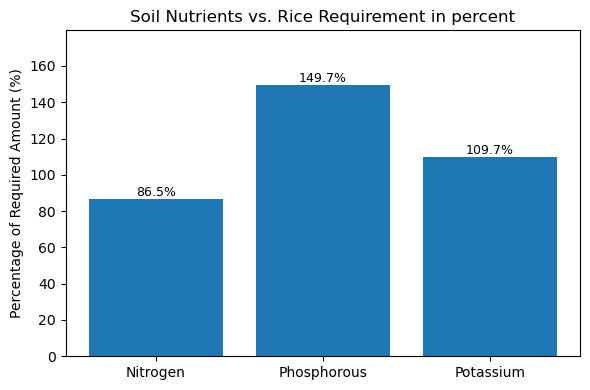

In [12]:
plt.figure(figsize=(6,4))
bars = plt.bar(summary["Nutrient"], summary["%_of_Target"])
plt.ylabel("Percentage of Required Amount (%)")
plt.title("Soil Nutrients vs. Rice Requirement in percent")
top = float(np.nanmax(summary["%_of_Target"])) if len(summary) else 100
plt.ylim(0, max(120, top * 1.2))
for bar, val in zip(bars, summary["%_of_Target"]):
    h = bar.get_height()
    plt.text(bar.get_x()+bar.get_width()/2, h, f"{val:.1f}%", ha="center", va="bottom", fontsize=9)

plt.tight_layout()
plt.savefig("rice_soil_nutrient_bar_new.png", dpi=200)
plt.show()